<a href="https://colab.research.google.com/github/tanishka2000/HDR-KNN/blob/main/HDR_AI_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

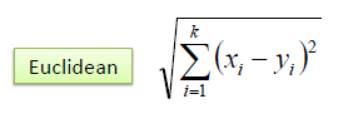

Calculation of Euclidean distance

In [ ]:
import math

def Euclidean_distance(row1, row2):
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)

Get the k nearest neighbors after sorting distance

In [ ]:
def Get_Neighbors(train, test_row, num):
    distance = list() # []
    data = []
    
    for i in train:
        dist = Euclidean_distance(test_row, i)
        distance = np.append(distance,dist)
        data = np.append(data, i)
        distance = np.array(distance)
    
    data = np.array(data)
        
    #Finding the index in ascending order
    index_dist = distance.argsort()
        
    #Arranging data according to index
    data = data[index_dist]
        
    #slicing k value from number of data
    neighbors = data[:num]
        
    return neighbors

Predicting the class of the new data point

In [ ]:
def predict_classification(train, test_row, num):
    Neighbors = Get_Neighbors(train, test_row, num)
    classes = list()
    
    for i in Neighbors:
        classes.append(i)
    
    prediction = max(classes, key= classes.count)
    return prediction

Accuracy calculation

Accuracy = Number of features classified correctly/Number of Features

In [ ]:
def accuracy(y_true, y_pred):
    n_correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            n_correct += 1
            
    acc = n_correct/len(y_true)
    return acc

Recognition of Handwritten Digits using K -nearest Neighbors

MNIST Dataset ( Modified National Institute of Standards and Technology )

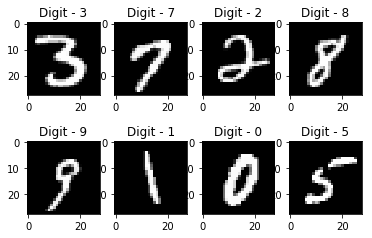

In [ ]:
#import libraries

from sklearn.datasets import fetch_openml, load_digits
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
#fetch dataset
mnist = fetch_openml( 'mnist_784' ) 

In [ ]:
# checking the column names and preprocessing target values in standard format
mnist.keys()
mnist.target = mnist.target.astype(np.int8)


#Determining independent and dependent variable and finding the shape
x = np.array(mnist.data)
y = np.array(mnist.target)
x.shape, y.shape


#output ((70000, 784), (70000,))
# shuffling the values of x and y
si = np.random.permutation(x.shape[0])
x = x[si]
y = y[si]

test some random digit from the data set

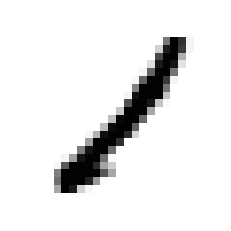

In [ ]:
some_digit = x[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [ ]:
#slicing data
trainx = x[:2000]
trainy = y[:2000]
#Inserting trainy in trainx
train = np.insert(trainx, 784, trainy, axis = 1)
prediction = predict_classification(train, train[1244], 4)
prediction
#Output 8.0

0.0
0.0
0.0
170.0


0.0

In [ ]:
train[1244][-1]

9.0

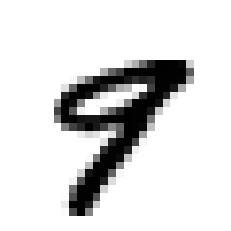

In [ ]:
#Plotting the output
some_digit = train[1244][:-1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [ ]:
import time 
start_time = time.time() 

y_pred=[]
y_true=train[:,-1]
for i in range(len(train)):
    prediction = predict_classification(train, train[i], 4)
    y_pred.append(prediction)


print("--- %s seconds ---" % (time.time() - start_time))

# Accuracy
print(accuracy(y_true, y_pred))
# Output 0.929 (i.e., 92%)

--- 5860.450417757034 seconds ---
0.094
